In [ ]:
!pip3 install pesq

  Preparing metadata (setup.py) ... done
  Created wheel for pesq: filename=pesq-0.0.4-cp310-cp310-linux_x86_64.whl size=262959 sha256=b4c1ac02f050f09560a93257fffede8e9af46e5b0362bedcb6704fc5563d2870
  Stored in directory: /root/.cache/pip/wheels/c5/4e/2c/251524370c0fdd659e99639a0fbd0ca5a782c3aafcd456b28d
Successfully built pesq


In [ ]:
!pip install librosa
!pip install matplotlib

Taxa de amostragem: 22050


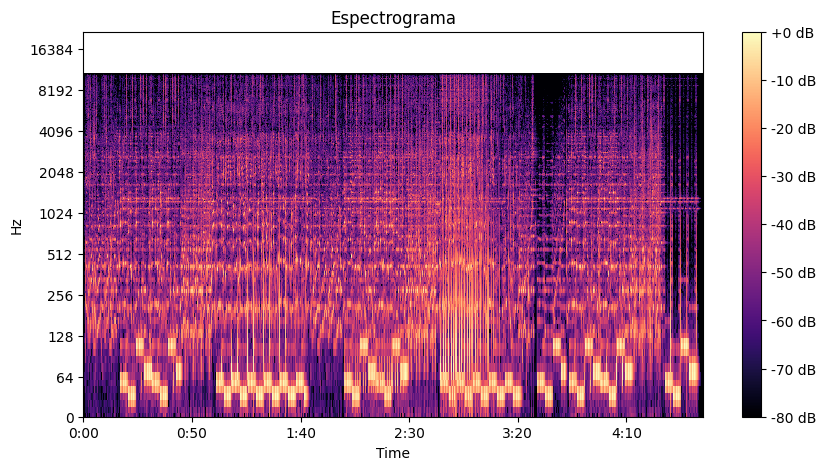

Distorção THD: 38.65818850162895 %


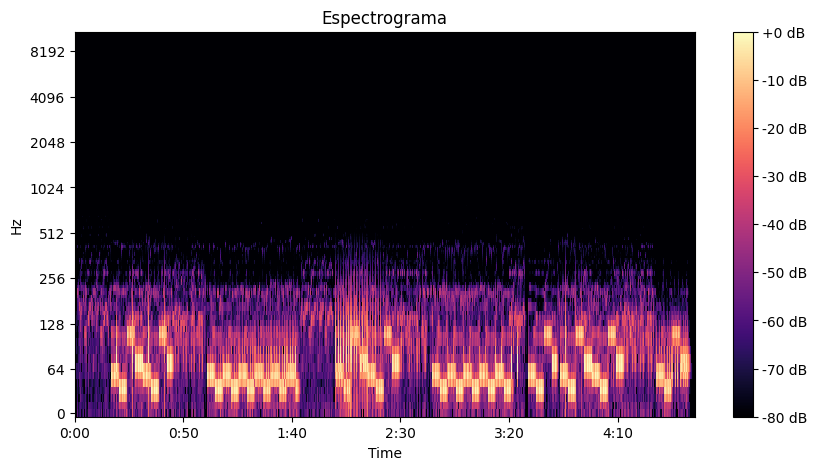

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scipy.signal as signal

def calculate_thd(y, sr):
    """
    Calcula a Distorção Harmônica Total (THD) do sinal de áudio.
    """
    # FFT do sinal
    fft = np.fft.fft(y)
    freqs = np.fft.fftfreq(len(fft), 1/sr)

    # Magnitude do espectro
    magnitude = np.abs(fft)

    # Fundamental (maior pico na FFT)
    fundamental_idx = np.argmax(magnitude)
    fundamental_freq = freqs[fundamental_idx]
    fundamental_magnitude = magnitude[fundamental_idx]

    # Calcular THD
    harmonics = []
    for i in range(2, 6):  # Considera até a 5ª harmônica
        harmonic_freq = i * fundamental_freq
        harmonic_idx = np.argmin(np.abs(freqs - harmonic_freq))
        harmonics.append(magnitude[harmonic_idx])

    thd = np.sqrt(np.sum(np.square(harmonics))) / fundamental_magnitude
    thd_percent = thd * 100
    return thd_percent



def analyze_audio_lpf(y, sr):
    cutoff = 80.0

    # Normalizar a frequência de corte em relação à frequência de Nyquist
    nyquist = 0.5 * sr
    normal_cutoff = cutoff / nyquist

    # Criar o filtro Butterworth de 4ª ordem
    b, a = signal.butter(4, normal_cutoff, btype='low', analog=False)

    # Aplicar o filtro no sinal de áudio
    y_filtered = signal.lfilter(b, a, y)

    # Calcula o espectrograma
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y_filtered)), ref=np.max)

    # Plota o espectrograma
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma')

    plt.show()



def analyze_audio(audio_file):
    # Carrega o arquivo de áudio
    y, sr = librosa.load(audio_file)

    # Exibe a taxa de amostragem
    print("Taxa de amostragem:", sr)

    # Calcula o espectrograma
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Plota o espectrograma
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')

    plt.title('Espectrograma')

    plt.show()

    # Calcular e exibir THD
    thd_percent = calculate_thd(y, sr)
    print("Distorção THD:", thd_percent, "%")

    analyze_audio_lpf(y, sr)

# Exemplo de uso
audio_file = "/content/detalhes.mp3"  # Substitua pelo nome do seu arquivo .mp3
analyze_audio(audio_file)



In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scipy.signal as signal

def calculate_thd(y, sr):
    """
    Calcula a Distorção Harmônica Total (THD) do sinal de áudio.
    """
    # FFT do sinal
    fft = np.fft.fft(y)
    freqs = np.fft.fftfreq(len(fft), 1/sr)

    # Magnitude do espectro
    magnitude = np.abs(fft)

    # Fundamental (maior pico na FFT)
    fundamental_idx = np.argmax(magnitude)
    fundamental_freq = freqs[fundamental_idx]
    fundamental_magnitude = magnitude[fundamental_idx]

    # Calcular THD
    harmonics = []
    for i in range(2, 6):  # Considera até a 5ª harmônica
        harmonic_freq = i * fundamental_freq
        harmonic_idx = np.argmin(np.abs(freqs - harmonic_freq))
        harmonics.append(magnitude[harmonic_idx])

    thd = np.sqrt(np.sum(np.square(harmonics))) / fundamental_magnitude
    thd_percent = thd * 100
    return thd_percent

def analyze_audio(audio_file):
    # Carrega o arquivo de áudio FLAC
    y, sr = librosa.load(audio_file, sr=None)  # sr=None para preservar a taxa de amostragem original

    # Exibe a taxa de amostragem
    print("Taxa de amostragem:", sr)

    # Calcula o espectrograma
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Plota o espectrograma
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma')

    plt.show()

    # Calcular e exibir THD
    thd_percent = calculate_thd(y, sr)
    print("Distorção THD:", thd_percent, "%")

    # Reproduzir o áudio degradado
    display(Audio(y, rate=sr))



# Exemplo de uso
audio_file = "/content/TreeDays.flac"  # Substitua pelo nome do seu arquivo FLAC
analyze_audio(audio_file)


In [ ]:
# prompt: Consegue fazer o mesmo plot do bloco acima, porem reduzindo a amostragem para 1/4 da resolução? Consegue fazer o plot com limite em 22khz, como o plot simplesmente parou em 4khz? Consegue fazer um botao de player para ouvir a midia degradada?

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scipy.signal as signal
from IPython.display import Audio, display

def calculate_thd(y, sr):
    """
    Calcula a Distorção Harmônica Total (THD) do sinal de áudio.
    """
    # FFT do sinal
    fft = np.fft.fft(y)
    freqs = np.fft.fftfreq(len(fft), 1/sr)

    # Magnitude do espectro
    magnitude = np.abs(fft)

    # Fundamental (maior pico na FFT)
    fundamental_idx = np.argmax(magnitude)
    fundamental_freq = freqs[fundamental_idx]
    fundamental_magnitude = magnitude[fundamental_idx]

    # Calcular THD
    harmonics = []
    for i in range(2, 6):  # Considera até a 5ª harmônica
        harmonic_freq = i * fundamental_freq
        harmonic_idx = np.argmin(np.abs(freqs - harmonic_freq))
        harmonics.append(magnitude[harmonic_idx])

    thd = np.sqrt(np.sum(np.square(harmonics))) / fundamental_magnitude
    thd_percent = thd * 100
    return thd_percent


def analyze_audio(audio_file):
    # Carrega o arquivo de áudio FLAC
    y, sr = librosa.load(audio_file, sr=None)  # sr=None para preservar a taxa de amostragem original

    # Reduz a amostragem para 1/4 da resolução
    y_downsampled = librosa.resample(y, orig_sr=sr, target_sr=sr // 4)
    sr_downsampled = sr // 4

    # Exibe a taxa de amostragem
    print("Taxa de amostragem original:", sr)
    print("Taxa de amostragem reduzida:", sr_downsampled)

    # Calcula o espectrograma
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y_downsampled)), ref=np.max)

    # Plota o espectrograma com limite em 22kHz
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(D, sr=sr_downsampled, x_axis='time', y_axis='log',
                             fmax=22000)  # Define fmax para 22kHz
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma (Amostragem Reduzida)')

    plt.show()

    # Calcular e exibir THD
    thd_percent = calculate_thd(y_downsampled, sr_downsampled)
    print("Distorção THD:", thd_percent, "%")

    # Reproduzir o áudio degradado
    display(Audio(y_downsampled, rate=sr_downsampled))


# Exemplo de uso
audio_file = "/content/TreeDays.flac"  # Substitua pelo nome do seu arquivo FLAC
analyze_audio(audio_file)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def laplace_transform(y, t):
    """
    Aproxima a Transformada de Laplace para um sinal discreto.
    :param y: Sinal de áudio (discreto)
    :param t: Vetor de tempo
    """
    # Valores arbitrários de s (espaço complexo)
    s = np.linspace(0, 5000, len(t)) + 1j * np.linspace(0, 5000, len(t))

    # Aproximação da Transformada de Laplace
    L_y = np.array([np.trapz(y * np.exp(-si * t), t) for si in s])

    return s, L_y

def plot_laplace(audio_file):
    # Carrega o arquivo de áudio
    y, sr = librosa.load(audio_file, sr=None)

    # Define o vetor de tempo
    t = np.linspace(0, len(y) / sr, len(y))

    # Reduz a amostragem para 1/4 da resolução
    y_downsampled = librosa.resample(y, orig_sr=sr, target_sr=sr // 4)
    t_downsampled = np.linspace(0, len(y_downsampled) / (sr // 4), len(y_downsampled))

    # Aproxima a Transformada de Laplace
    s, L_y = laplace_transform(y_downsampled, t_downsampled)

    # Plota o espectro da Transformada de Laplace
    plt.figure(figsize=(10, 6))
    plt.plot(np.abs(s.imag), np.abs(L_y))
    plt.title("Transformada de Laplace (Amostragem Reduzida)")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim([0, 22000])  # Limita até 22kHz para corresponder ao áudio
    plt.grid(True)
    plt.show()

# Exemplo de uso
audio_file = "/content/TreeDays.flac"  # Substitua pelo seu arquivo FLAC
plot_laplace(audio_file)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import librosa
import numpy as np
from pesq import pesq
from scipy import signal
import os

# Defina o tamanho da janela para os dados de alta resolução (4096)
window_size_hr = 4096  # Tamanho da janela de alta resolução
window_size_lr = window_size_hr // 4  # Tamanho da janela de baixa resolução

def calculate_thd(y, sr):
    """
    Calcula a Distorção Harmônica Total (THD) do sinal de áudio.
    """
    # FFT do sinal
    fft = np.fft.fft(y)
    freqs = np.fft.fftfreq(len(fft), 1 / sr)

    # Magnitude do espectro
    magnitude = np.abs(fft)

    # Fundamental (maior pico na FFT)
    fundamental_idx = np.argmax(magnitude)
    fundamental_freq = freqs[fundamental_idx]
    fundamental_magnitude = magnitude[fundamental_idx]

    # Calcular THD
    harmonics = []
    for i in range(2, 6):  # Considera até a 5ª harmônica
        harmonic_freq = i * fundamental_freq
        harmonic_idx = np.argmin(np.abs(freqs - harmonic_freq))
        harmonics.append(magnitude[harmonic_idx])

    thd = np.sqrt(np.sum(np.square(harmonics))) / fundamental_magnitude
    thd_percent = thd * 100
    return thd_percent

# Função para ser usada como métrica customizada
def thd_metric(y_true, y_pred):
    """
    Função customizada para medir THD entre a predição e o áudio real.
    """
    sr = 16000  # Defina a taxa de amostragem usada no áudio
    y_true_np = y_true.numpy().flatten()  # Converta tensores para arrays numpy
    y_pred_np = y_pred.numpy().flatten()

    # Calcular THD do áudio original e do áudio predito
    thd_original = calculate_thd(y_true_np, sr)
    thd_predito = calculate_thd(y_pred_np, sr)

    # A diferença entre os THDs pode ser uma métrica
    thd_diff = np.abs(thd_original - thd_predito)
    return thd_diff

# Função adaptada para TensorFlow para ser utilizada no modelo
def thd_metric_tf(y_true, y_pred):
    return tf.py_function(thd_metric, [y_true, y_pred], tf.float32)

# Função para calcular o PSNR
def psnr_metric(y_true, y_pred):
    max_pixel = tf.reduce_max(y_true)
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    psnr = 20 * tf.math.log(max_pixel / tf.math.sqrt(mse)) / tf.math.log(10.0)
    return psnr

def gaussian_filter(size: int, sigma: float):
    """Cria um filtro gaussiano 1D para suavização."""
    x = tf.range(-size // 2 + 1, size // 2 + 1, dtype=tf.float32)
    g = tf.exp(-tf.pow(x, 2) / (2.0 * sigma ** 2))
    return g / tf.reduce_sum(g)

def ssim_metric(y_true, y_pred, max_val=None):
    """Calcula SSIM para sinais 1D."""
    if max_val is None:
        max_val = tf.reduce_max(y_true)

    K1 = 0.01
    K2 = 0.03
    L = max_val  # Valor máximo dinâmico do sinal

    # Constantes para estabilizar divisões com denominadores pequenos
    C1 = (K1 * L) ** 2
    C2 = (K2 * L) ** 2

    # Aplicar filtro gaussiano para suavizar os sinais
    window = gaussian_filter(size=11, sigma=1.5)
    window = tf.reshape(window, [-1, 1, 1])  # Filtro 1D

    def apply_filter(signal):
        return tf.nn.conv1d(signal, window, stride=1, padding='VALID')

    mu_true = apply_filter(y_true)
    mu_pred = apply_filter(y_pred)

    mu_true_sq = mu_true ** 2
    mu_pred_sq = mu_pred ** 2
    mu_true_pred = mu_true * mu_pred

    sigma_true_sq = apply_filter(y_true ** 2) - mu_true_sq
    sigma_pred_sq = apply_filter(y_pred ** 2) - mu_pred_sq
    sigma_true_pred = apply_filter(y_true * y_pred) - mu_true_pred

    # Calcular SSIM 1D
    ssim_n = (2.0 * mu_true_pred + C1) * (2.0 * sigma_true_pred + C2)
    ssim_d = (mu_true_sq + mu_pred_sq + C1) * (sigma_true_sq + sigma_pred_sq + C2)
    ssim = ssim_n / ssim_d

    return tf.reduce_mean(ssim)

# Função para calcular o SDR
def sdr_metric(y_true, y_pred):
    sdr = 10 * tf.math.log(tf.reduce_sum(y_true ** 2) / tf.reduce_sum((y_true - y_pred) ** 2)) / tf.math.log(10.0)
    return sdr

def create_audio_super_resolution_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Primeira camada de convolução
    x = layers.Conv1D(64, kernel_size=9, padding='same', activation='relu')(inputs)

    # Blocos residuais
    for _ in range(8):  # Número de blocos residuais
        shortcut = x
        x = layers.Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
        x = layers.Conv1D(64, kernel_size=3, padding='same')(x)
        x = layers.Add()([x, shortcut])
        x = layers.Activation('relu')(x)

    # Camada de upsampling (com convolução transposta ou UpSampling1D)
    x = layers.Conv1DTranspose(128, kernel_size=3, strides=4, padding='same', activation='relu')(x)

    # Camada de saída
    outputs = layers.Conv1D(1, kernel_size=9, padding='same', activation='linear')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Criar o modelo de super-resolução de áudio
input_shape = (window_size_lr, 1)  # Forma da entrada (baixa resolução)
model = create_audio_super_resolution_model(input_shape)

# Compilar o modelo
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[sdr_metric, psnr_metric, ssim_metric, thd_metric_tf, 'mean_absolute_error'])

model.summary()

# Carregar o áudio de alta resolução (TreeDays.flac)
#audio_path = '/content/TreeDays.flac'
#audio_data, sr = librosa.load(audio_path, sr=None)
#print('Amostragem da música de treinamento: ', sr)

# Caminho da pasta com as músicas em formato FLAC
audio_folder = '/content/flac_music'

def load_flac_files(audio_folder):
    # Inicializa uma lista para armazenar os áudios carregados
    audio_data = []
    sample_rate = None

    # Itera sobre todos os arquivos na pasta
    for file_name in os.listdir(audio_folder):
        if file_name.endswith('.flac'):  # Verifica se é um arquivo FLAC
            file_path = os.path.join(audio_folder, file_name)

            # Carrega o áudio
            audio, sr = librosa.load(file_path, sr=None)
            print(f'Carregado: {file_name} | Taxa de Amostragem: {sr} Hz')

            # Normaliza o áudio para ter amplitude entre -1 e 1
            audio = audio / np.max(np.abs(audio))

            # Armazena o áudio na lista
            audio_data.append(audio)

            # Define a taxa de amostragem (supomos que todos os arquivos têm a mesma taxa)
            if sample_rate is None:
                sample_rate = sr

    return np.concatenate(audio_data), sample_rate  # Concatena todos os áudios carregados

# Carregar todos os arquivos FLAC da pasta
audio_data, sr = load_flac_files(audio_folder)

print(f'Número total de amostras carregadas: {len(audio_data)}')
print(f'Taxa de amostragem usada no treinamento: {sr}')

# Criar o áudio de baixa resolução reamostrando o áudio de alta resolução
low_quality_audio = librosa.resample(audio_data, orig_sr=sr, target_sr=sr // 4)

# Dividir o áudio em janelas
def create_windows(audio, window_size):
    num_windows = len(audio) // window_size
    windows = np.array([audio[i * window_size:(i + 1) * window_size] for i in range(num_windows)])
    return windows

# Criar janelas de alta e baixa resolução
high_quality_windows = create_windows(audio_data, window_size_hr)
low_quality_windows = create_windows(low_quality_audio, window_size_lr)

# Ajustar as formas dos dados para o modelo
high_quality_windows = high_quality_windows.reshape(-1, window_size_hr, 1)
low_quality_windows = low_quality_windows.reshape(-1, window_size_lr, 1)

# Treinar o modelo
model.fit(low_quality_windows, high_quality_windows, epochs=20, batch_size=32, validation_split=0.2)


In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
from IPython.display import Audio

up = 2
# Função para plotar espectrograma
def plot_spectrogram(audio, sr, title):
    plt.figure(figsize=(10, 4))
    S = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()


high_quality_audio, sr = librosa.load('/content/TreeDays.flac', sr=None)

# Simular áudio de baixa resolução (degradado)
low_quality_audio = librosa.resample(high_quality_audio, orig_sr=sr, target_sr=sr // up)

# Dividir o áudio de baixa resolução em janelas menores
window_size = 1024*128  # Tamanho da janela - ajustado para 1024
hop_size = window_size // up  # Tamanho do salto
num_windows = (len(low_quality_audio) - window_size) // hop_size + 1
print(num_windows)
upscaled_audio = np.zeros(len(low_quality_audio) * up)  # Inicializar o áudio upscaled

for i in range(num_windows):
    start = i * hop_size
    end = start + window_size
    window = low_quality_audio[start:end].reshape(1, -1, 1)
    upscaled_window = model.predict(window).reshape(-1)
    upscaled_audio[start * up:end * up] = upscaled_window  # Preencher o áudio upscaled


# Plotar espectrograma dos três áudios
plot_spectrogram(high_quality_audio, sr, "High Quality Audio (Original)")
plot_spectrogram(low_quality_audio, sr // up, "Low Quality Audio (Degradado)")
plot_spectrogram(upscaled_audio, sr, "Upscaled Audio")

# Reproduzir os áudios
print("Playing High Quality Audio (Original):")
display(Audio(high_quality_audio, rate=sr))

print("Playing Low Quality Audio (Degradado):")
display(Audio(low_quality_audio, rate=sr // up))

print("Playing Upscaled Audio:")
display(Audio(upscaled_audio, rate=sr))


##Dominio da frequencia

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import librosa
import numpy as np
from pesq import pesq
from scipy import signal
import os
import random
import matplotlib.pyplot as plt

# Definir as funções de data augmentation (já apresentadas acima)
def add_gaussian_noise(y, noise_level=0.005):
    noise = np.random.normal(0, noise_level, y.shape)
    y_noisy = y + noise
    y_noisy = y_noisy.astype(type(y[0]))
    return y_noisy

def time_stretch(y, rate=1.0):
    return librosa.effects.time_stretch(y, rate=rate) # Added rate=rate

def time_shift(y, shift_max=0.2):
    shift = np.random.randint(int(len(y) * shift_max))
    if random.random() > 0.5:
        shift = -shift
    y_shifted = np.roll(y, shift)
    # Preencher o início ou o fim com zeros
    if shift > 0:
        y_shifted[:shift] = 0
    else:
        y_shifted[shift:] = 0
    return y_shifted

def pitch_shift(y, sr, n_steps=0):
    return librosa.effects.pitch_shift(y, sr, n_steps)

def change_volume(y, factor=1.0):
    return y * factor

def apply_lowpass_filter(y, sr, cutoff=4000):
    sos = signal.butter(10, cutoff, 'low', fs=sr, output='sos')
    return signal.sosfilt(sos, y)

def apply_highpass_filter(y, sr, cutoff=500):
    sos = signal.butter(10, cutoff, 'high', fs=sr, output='sos')
    return signal.sosfilt(sos, y)

def augment_audio(y, sr):
    # Definir as probabilidades para cada tipo de augmentação
    if random.random() < 0.5:
        y = add_gaussian_noise(y, noise_level=0.005)
    if random.random() < 0.5:
        rate = random.uniform(0.8, 1.2)
        y = time_stretch(y, rate=rate)
    if random.random() < 0.5:
        y = time_shift(y, shift_max=0.2)
    if random.random() < 0.3:
        n_steps = random.randint(-5, 5)
        y = pitch_shift(y, sr, n_steps=n_steps)
    if random.random() < 0.3:
        factor = random.uniform(0.8, 1.2)
        y = change_volume(y, factor)
    if random.random() < 0.3:
        y = apply_lowpass_filter(y, sr, cutoff=4000)
    if random.random() < 0.3:
        y = apply_highpass_filter(y, sr, cutoff=500)
    # Adicione outras técnicas de augmentação conforme necessário
    return y

def load_flac_files_with_augmentation(audio_folder, augment=True):
    # Inicializa uma lista para armazenar os áudios carregados
    audio_data = []
    sample_rate = None

    # Itera sobre todos os arquivos na pasta
    for file_name in os.listdir(audio_folder):
        if file_name.endswith('.flac'):  # Verifica se é um arquivo FLAC
            file_path = os.path.join(audio_folder, file_name)

            # Carrega o áudio
            audio, sr = librosa.load(file_path, sr=None)
            print(f'Carregado: {file_name} | Taxa de Amostragem: {sr} Hz')

            # Normaliza o áudio para ter amplitude entre -1 e 1
            audio = audio / np.max(np.abs(audio))

            # Aplica data augmentation se ativado
            if augment:
                audio = augment_audio(audio, sr)

            # Armazena o áudio na lista
            audio_data.append(audio)

            # Define a taxa de amostragem (supomos que todos os arquivos têm a mesma taxa)
            if sample_rate is None:
                sample_rate = sr

    return np.concatenate(audio_data), sample_rate  # Concatena todos os áudios carregados

# Definir o tamanho da janela para os dados de alta resolução (4096)
window_size_hr = 4096  # Tamanho da janela de alta resolução
window_size_lr = window_size_hr // 4  # Tamanho da janela de baixa resolução

# Carregar todos os arquivos FLAC da pasta com data augmentation
audio_folder = '/content/flac_music'
audio_data, sr = load_flac_files_with_augmentation(audio_folder, augment=True)

print(f'Número total de amostras carregadas após augmentação: {len(audio_data)}')
print(f'Taxa de amostragem usada no treinamento: {sr}')

# Criar o áudio de baixa resolução reamostrando o áudio de alta resolução
low_quality_audio = librosa.resample(audio_data, orig_sr=sr, target_sr=sr // 4)

# Dividir o áudio em janelas
def create_windows(audio, window_size):
    num_windows = len(audio) // window_size
    windows = np.array([audio[i * window_size:(i + 1) * window_size] for i in range(num_windows)])
    return windows

# Criar janelas de alta e baixa resolução
high_quality_windows = create_windows(audio_data, window_size_hr)
low_quality_windows = create_windows(low_quality_audio, window_size_lr)

print(f'Número de janelas de alta resolução: {high_quality_windows.shape[0]}')
print(f'Número de janelas de baixa resolução: {low_quality_windows.shape[0]}')

# Ajustar as formas dos dados para o modelo
high_quality_windows = high_quality_windows.reshape(-1, window_size_hr, 1)
low_quality_windows = low_quality_windows.reshape(-1, window_size_lr, 1)

print(f'Shape de high_quality_windows: {high_quality_windows.shape}')
print(f'Shape de low_quality_windows: {low_quality_windows.shape}')

# Verificar se o número de janelas coincide
min_windows = min(high_quality_windows.shape[0], low_quality_windows.shape[0])
high_quality_windows = high_quality_windows[:min_windows]
low_quality_windows = low_quality_windows[:min_windows]

# Atualizar os shapes após sincronização
print(f'Após sincronização - high_quality_windows: {high_quality_windows.shape}')
print(f'Após sincronização - low_quality_windows: {low_quality_windows.shape}')

# Definir as métricas personalizadas (já fornecidas no seu código)
# [thd_metric_tf, sdr_metric, psnr_metric, ssim_metric] já estão definidos

# Definir o modelo de super-resolução
def create_audio_super_resolution_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Primeira camada de convolução
    x = layers.Conv1D(64, kernel_size=9, padding='same', activation='relu')(inputs)

    # Blocos residuais
    for _ in range(8):  # Número de blocos residuais
        shortcut = x
        x = layers.Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
        x = layers.Conv1D(64, kernel_size=3, padding='same')(x)
        x = layers.Add()([x, shortcut])
        x = layers.Activation('relu')(x)

    # Camada de upsampling
    x = layers.Conv1DTranspose(128, kernel_size=3, strides=4, padding='same', activation='relu')(x)

    # Camada de saída
    outputs = layers.Conv1D(1, kernel_size=9, padding='same', activation='linear')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Criar o modelo de super-resolução de áudio
input_shape = (window_size_lr, 1)  # Forma da entrada (baixa resolução)
model = create_audio_super_resolution_model(input_shape)

# Compilar o modelo com as métricas personalizadas
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[sdr_metric, psnr_metric, ssim_metric, thd_metric_tf, 'mean_absolute_error'])

model.summary()

# Treinar o modelo
history = model.fit(
    low_quality_windows,
    high_quality_windows,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)
